In [1]:
import mlflow
import pandas as pd
from tg.datasets import DATASET_FACTORY_LOOKUP
import matplotlib.pyplot as plt
import numpy as np
from tg import get_data_path, get_root_path
import glob

In [2]:
mlflow.set_tracking_uri("file:///{}".format(get_root_path("mlruns")))
experiment = mlflow.get_experiment('0')

In [3]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

Traceback (most recent call last):
  File "c:\Users\Rafa\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 826, in _list_run_infos
    run_info = self._get_run_info_from_dir(r_dir)
  File "c:\Users\Rafa\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 658, in _get_run_info_from_dir
    meta = FileStore._read_yaml(run_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\Users\Rafa\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 1075, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\Users\Rafa\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 1068, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\Users\Rafa\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\utils\file_utils.py", line 181, in read_yaml
    raise MissingC

In [4]:
get_root_path("mlruns")

'C:\\Users\\Rafa\\Documents\\Github\\tg\\mlruns'

In [5]:
runs['artifact_uri'] = runs['artifact_uri'].apply(lambda x: x.replace(
    x.split('mlruns')[0], 'file///{}'.format(get_root_path(""))).replace(
        '\\', '/'))


In [6]:
metrics_table = runs[[
    "params.model_name", "metrics.rmse", "metrics.mape", "metrics.smape",
    "metrics.mae", "params.dataset_name"
]].copy()


In [7]:
metrics_table = metrics_table.rename(
    columns={
        "params.model_name": "Modelo",
        "metrics.rmse": "RMSE",
        "metrics.mae": "MAE",
        "metrics.mape": "MAPE",
        "metrics.smape": "sMAPE",
        "params.dataset_name": "Conjunto de dados"
    }).sort_values(["Conjunto de dados", "sMAPE"])
columns_order = ["Modelo", "Conjunto de dados", "RMSE", "MAE", "MAPE", "sMAPE"]

metrics_table["Conjunto de dados"] = metrics_table[
    "Conjunto de dados"].replace({
        "AIR_PASSENGERS": "Passageiros aéreos",
        "HOMICIDES": 'Homicídios dolosos'
    })


In [8]:
np.round(metrics_table, 3)

,Modelo,RMSE,MAPE,sMAPE,MAE,Conjunto de dados
21,SARIMA_SVR,16.770,3.030,1.502,12.563,Passageiros aéreos
23,SARIMA,17.905,3.300,1.653,14.362,Passageiros aéreos
25,SVR,18.333,3.398,1.718,14.965,Passageiros aéreos
24,RNN,20.458,3.673,1.856,16.654,Passageiros aéreos
22,ARIMA_RNN,30.814,4.923,2.500,20.856,Passageiros aéreos
27,ARIMA,43.408,8.417,4.242,36.096,Passageiros aéreos
26,NAIVE,51.618,10.185,5.071,44.138,Passageiros aéreos
14,SARIMA_SVR,28.288,5.331,2.620,20.482,Homicídios dolosos
18,SARIMA,30.119,6.275,3.078,23.984,Homicídios dolosos
15,ARIMA_RNN,32.552,6.348,3.120,24.482,Homicídios dolosos


In [9]:
_metrics_table = metrics_table[columns_order].round(1).set_index(
    ["Conjunto de dados", "Modelo"])
latex_metrics_table = _metrics_table.to_latex()
print(latex_metrics_table)

\begin{tabular}{llrrrr}
\toprule
               &       &  RMSE &   MAE &  MAPE &  sMAPE \\
Conjunto de dados & Modelo &       &       &       &        \\
\midrule
Passageiros aéreos & SARIMA\_SVR &  16.8 &  12.6 &   3.0 &    1.5 \\
               & SARIMA &  17.9 &  14.4 &   3.3 &    1.7 \\
               & SVR &  18.3 &  15.0 &   3.4 &    1.7 \\
               & RNN &  20.5 &  16.7 &   3.7 &    1.9 \\
               & ARIMA\_RNN &  30.8 &  20.9 &   4.9 &    2.5 \\
               & ARIMA &  43.4 &  36.1 &   8.4 &    4.2 \\
               & NAIVE &  51.6 &  44.1 &  10.2 &    5.1 \\
Homicídios dolosos & SARIMA\_SVR &  28.3 &  20.5 &   5.3 &    2.6 \\
               & SARIMA &  30.1 &  24.0 &   6.3 &    3.1 \\
               & ARIMA\_RNN &  32.6 &  24.5 &   6.3 &    3.1 \\
               & RNN &  32.0 &  24.1 &   6.6 &    3.2 \\
               & ARIMA &  32.7 &  26.7 &   6.9 &    3.4 \\
               & NAIVE &  32.9 &  27.1 &   6.9 &    3.4 \\
               & SVR &  34.4 &  27.5 &   7.

C:\Users\Rafa\AppData\Local\Temp\ipykernel_20264\1824765077.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_metrics_table = _metrics_table.to_latex()


In [10]:
preds_by_model = pd.DataFrame(
    columns=['model_name', 'dataset_name', 'prediction'])
for _, row in runs[[
        "params.model_name", "params.dataset_name", "artifact_uri"
]].iterrows():
    model = row["params.model_name"]
    dataset = row["params.dataset_name"]
    artifact_uri = row["artifact_uri"].split("///")[-1]
    glob_pattern = f"{artifact_uri}/*.csv"
    path = glob.glob(glob_pattern)[0]
    pred = pd.read_csv(path).iloc[:, 1].values
    preds_by_model = pd.concat([
        preds_by_model,
        pd.DataFrame([{
            "model_name": model,
            "dataset_name": dataset,
            "prediction": pred
        }])
    ])


In [11]:
dataset = "AIR_PASSENGERS"


In [12]:
model_name = "SARIMA_SVR"
dataset_name = "HOMICIDES"

series = DATASET_FACTORY_LOOKUP[dataset_name]()



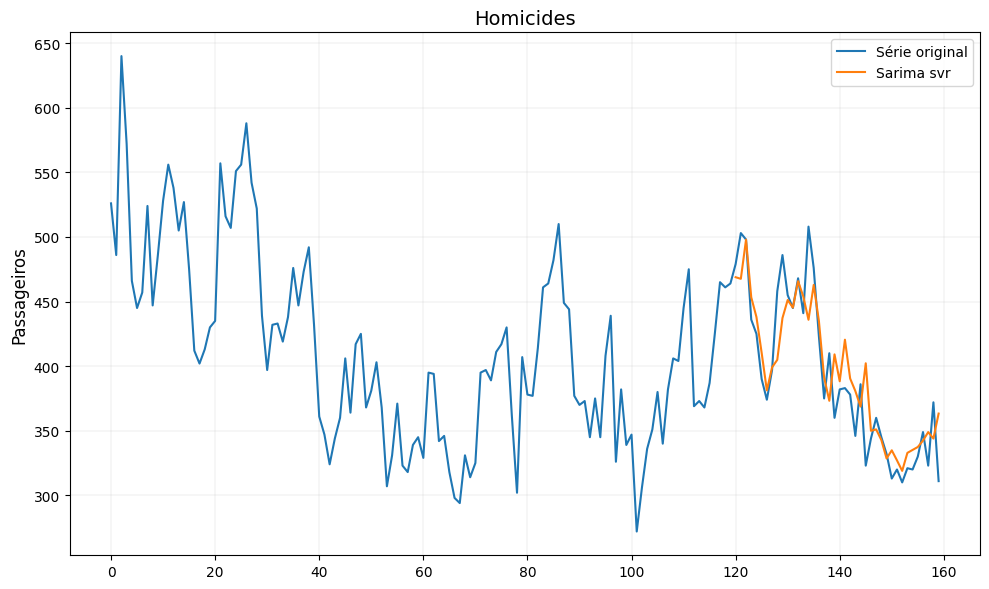

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(series)), series, label="Série original")
aux_pred = preds_by_model.loc[(preds_by_model['model_name'] == model_name) &
                   (preds_by_model['dataset_name'] == dataset_name), 'prediction'].values[0]
plt.plot(range(len(series)-len(aux_pred), len(series)), aux_pred, label=' '.join(model_name.split('_')).capitalize())
plt.ylabel("Passageiros", fontsize=12)
plt.title(' '.join(dataset_name.split('_')).capitalize(), fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid(linewidth=0.15)
# plt.savefig("air_passengers.jpg", dpi=600)
plt.show()